In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad
import time
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

def integra_mc_sin_numpy(fun, a, b, num_puntos=1000000):

    # 1- Calcular el valor maximo de la función en el intervalo [a, b]
    y_max = max(fun(x) for x in [i / 100 for i in range(int(a * 100), int(b * 100) + 1)])
    

    # 2- Generar puntos aleatorios
    x = [random.uniform(a, b) for _ in range(num_puntos)]
    y = [random.uniform(0, y_max) for _ in range(num_puntos)]

    # 3- Contar puntos debajo de la función
    puntos_debajo = sum(
        1 for x_i, y_i in zip(x, y) if y_i <= fun(x_i)
    )
  

    # 4- Calcular la integral aproximada
    area_rectangulo = (b - a) * y_max
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def integra_mc_con_numpy(fun, a, b, num_puntos=1000000):
    
    #Defino las x
    x = np.random.uniform(a, b, num_puntos)
    #ARRAYS de numpy + eficientes que listas
    
    #Para cada valor de x buscas su "y"  
    y_fun = fun(x)
    
    # Encontrar el máximo de la función en los puntos x
    max1 = np.max(y_fun)
    
    #Defino y aleatorias para dibujar las cruces
    y = np.random.uniform(0, max1, num_puntos)
    
    # Contar cuántos puntos están por debajo de la función
    puntos_debajo = np.sum(y <= y_fun)
    
    # Calcular el área del rectángulo
    area_rectangulo = (b - a) * max1
    
    # Calcular la integral aproximada
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo

In [11]:
def compara_tiempos_dot(fun1,fun2,a,b,computeFunction):
    sizes = np.linspace(100, 10000000, 20,dtype=int)
    times_dot = []
    times_fast_dot = []
    
    for size in sizes:
        tic = time.process_time()
        dot = integra_mc_sin_numpy(computeFunction, a,b,size)
        toc = time.process_time()
        times_dot += [1000 * (toc - tic)]

        tic = time.process_time()
        fast_dot = integra_mc_con_numpy(computeFunction, a,b,size)
        toc = time.process_time()
        times_fast_dot += [1000 * (toc - tic)]
        
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend()
    plt.savefig('comparatiemposdot.png')

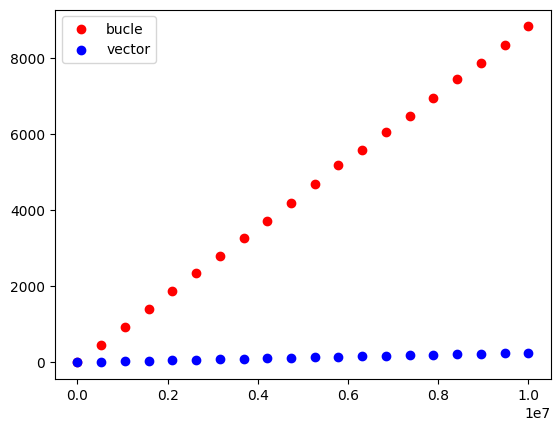

In [12]:
expr1 = (lambda x: x**2 + 1)  # funcion a integrar
expr2 = (lambda x: np.sin(x) + 2)
a, b = 0, 10  # limites del intervalo

compara_tiempos_dot(integra_mc_sin_numpy, integra_mc_con_numpy, a, b, expr2)